In [17]:
#CODE CAPTURE FRAME SENYUM 

import cv2
import os

# List of video file paths
video_files = ['D://project cps/data raw/sayyid/sayyid_senyum.mp4']

# Directory to save the extracted frames
output_dir = 'data raw/sayyid/extracted_frames_sayyid/senyum'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for video_file in video_files:
    # Capture the video
    cap = cv2.VideoCapture(video_file)
    
    # Get the video name without extension
    video_name = os.path.splitext(os.path.basename(video_file))[0]
    
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Create a filename for each frame
        frame_filename = os.path.join(output_dir, f'{video_name}_{frame_count}.jpg')
        
        # Save the frame as an image file
        cv2.imwrite(frame_filename, frame)
        
        frame_count += 1
    
    cap.release()

print("Frames extracted and saved successfully!")


Frames extracted and saved successfully!


In [18]:
#CODE CAPTURE FRAME TIDAK SENYUM 

import cv2
import os

# List of video file paths
video_files = ['D://project cps/data raw/sayyid/sayyid_tidak_senyum.mp4']

# Directory to save the extracted frames
output_dir = 'data raw/sayyid/extracted_frames_sayyid/tidak_senyum'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for video_file in video_files:
    # Capture the video
    cap = cv2.VideoCapture(video_file)
    
    # Get the video name without extension
    video_name = os.path.splitext(os.path.basename(video_file))[0]
    
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Create a filename for each frame
        frame_filename = os.path.join(output_dir, f'{video_name}_{frame_count}.jpg')
        
        # Save the frame as an image file
        cv2.imwrite(frame_filename, frame)
        
        frame_count += 1
    
    cap.release()

print("Frames extracted and saved successfully!")


Frames extracted and saved successfully!


In [19]:
#CROP SENYUM

import cv2
import os

# Initialize the face detector using Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Directories for input frames and output cropped faces
input_dir = 'c'
output_dir = 'data raw/sayyid/cropped_faces_sayyid/senyum'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over each file in the input directory
for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    
    if img is None:
        continue  # Skip files that couldn't be read

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Process each detected face
    for i, (x, y, w, h) in enumerate(faces):
        # Extract the face region
        face = img[y:y+h, x:x+w]
        
        # Generate a filename for the cropped face
        face_filename = os.path.join(output_dir, f'{filename.split(".")[0]}_face_{i}.jpg')
        
        # Save the cropped face as an image file
        cv2.imwrite(face_filename, face)

print("Faces cropped and saved successfully!")


Faces cropped and saved successfully!


In [20]:
import cv2
import os

# Initialize the face detector using Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Directories for input frames and output cropped faces
input_dir = 'data raw/sayyid/extracted_frames_sayyid/tidak_senyum'
output_dir = 'data raw/sayyid/cropped_faces_sayyid/tidak_senyum'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over each file in the input directory
for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    
    if img is None:
        continue  # Skip files that couldn't be read

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Process each detected face
    for i, (x, y, w, h) in enumerate(faces):
        # Extract the face region
        face = img[y:y+h, x:x+w]
        
        # Generate a filename for the cropped face
        face_filename = os.path.join(output_dir, f'{filename.split(".")[0]}_face_{i}.jpg')
        
        # Save the cropped face as an image file
        cv2.imwrite(face_filename, face)

print("Faces cropped and saved successfully!")


Faces cropped and saved successfully!


In [44]:
import cv2
import os

# Path to the directory containing your images
image_directory = 'D://project cps/data raw/sayyid/cropped_faces_sayyid/senyum'

# Path to the directory where you want to save the resized images
output_directory = 'D://project cps/DATA/positives/sayyid'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Loop through the images in the directory
for image_name in os.listdir(image_directory):
    # Load the image
    image_path = os.path.join(image_directory, image_name)
    image = cv2.imread(image_path)

    # Convert to grayscale (if needed)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Create the path for the resized image
    save_path = os.path.join(output_directory, image_name)

    # Save the resized image
    cv2.imwrite(save_path, resized_image)

print(f"Resized images saved in {output_directory}")

Resized images saved in D://project cps/DATA/positives/sayyid


In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from imutils import paths

# Paths to the positives and negatives directories
positives_dir = 'D://project cps/DATA/positives'
negatives_dir = 'D://project cps/DATA//negatives'

# Initialize lists to store data and labels
data = []
labels = []

# Helper function to process images from a given directory
def process_images(image_dir, label):
    # Loop through each person's folder in the specified directory
    for person_folder in os.listdir(image_dir):
        person_path = os.path.join(image_dir, person_folder)
        
        # Loop through each image in the person's folder
        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            
            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                continue  # Skip any images that fail to load
            
            # Convert the image to grayscale (if needed)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Resize the image to 28x28 pixels
            resized_image = cv2.resize(gray_image, (28, 28))
            
            # Normalize the image (scale pixel values to [0, 1])
            normalized_image = resized_image.astype("float32") / 255.0
            
            # Append the image and its label to the lists
            data.append(normalized_image)
            labels.append(label)

# Process positive (smiling) images
process_images(positives_dir, 'smiling')

# Process negative (not smiling) images
process_images(negatives_dir, 'not_smiling')

# Convert the lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels as integers (e.g., 'smiling' -> 1, 'not_smiling' -> 0)
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the labels to one-hot encoding
labels = to_categorical(labels, num_classes=2)

# Optionally, expand the dimensions of the data if your model expects it
data = np.expand_dims(data, axis=-1)  # Add a channel dimension if needed

print("Data and labels have been processed and are ready for model training.")


Data and labels have been processed and are ready for model training.


In [5]:
print("Data shape:", data.shape)  # Should be (number_of_images, 28, 28, 1)
print("Labels shape:", labels.shape)  # Should be (number_of_images, 2)

# Print the first few labels to verify
print("First 5 labels:", labels[-5:])


Data shape: (5262, 28, 28, 1)
Labels shape: (5262, 2)
First 5 labels: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


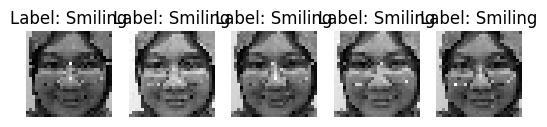

In [8]:
import matplotlib.pyplot as plt

# Plot the first 5 images and their labels
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[i].reshape(28, 28), cmap='gray')
    plt.title("Label: " + ("Smiling" if np.argmax(labels[i]) == 1 else "Not Smiling"))
    plt.axis('off')
plt.show()


In [4]:
import numpy as np

# Convert one-hot encoded labels back to integers
label_integers = np.argmax(labels, axis=1)

# Count the occurrences of each label
unique, counts = np.unique(label_integers, return_counts=True)
label_distribution = dict(zip(unique, counts))

print("Label distribution:", label_distribution)


Label distribution: {0: 2428, 1: 2834}


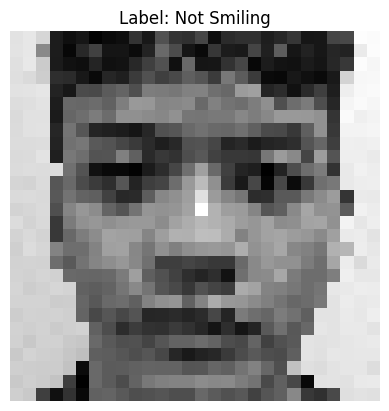

In [16]:
# Inspect the 10th image and its label
plt.imshow(data[4444].reshape(28, 28), cmap='gray')
plt.title("Label: " + ("Smiling" if np.argmax(labels[4444]) == 1 else "Not Smiling"))
plt.axis('off')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

print(f"Training data shape: {trainX.shape}, Training labels shape: {trainY.shape}")
print(f"Testing data shape: {testX.shape}, Testing labels shape: {testY.shape}")


Training data shape: (4209, 28, 28, 1), Training labels shape: (4209, 2)
Testing data shape: (1053, 28, 28, 1), Testing labels shape: (1053, 2)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for 2 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=15,
    batch_size=64,
    verbose=1
)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5609 - loss: 0.6799 - val_accuracy: 0.8594 - val_loss: 0.4527
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8817 - loss: 0.3261 - val_accuracy: 0.9478 - val_loss: 0.1433
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9766 - loss: 0.0884 - val_accuracy: 0.9487 - val_loss: 0.1171
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9771 - loss: 0.0642 - val_accuracy: 0.9915 - val_loss: 0.0332
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9945 - loss: 0.0236 - val_accuracy: 0.9953 - val_loss: 0.0150
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9970 - loss: 0.0117 - val_accuracy: 0.9953 - val_loss: 0.0249
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9973 - loss: 0.0145 - val_accuracy: 0.9962 - val_loss: 0.0138
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9977 - loss: 0.0111 - val_accuracy: 0.9953 - val_loss:

In [19]:
from sklearn.metrics import classification_report

# Evaluate the model
test_loss, test_acc = model.evaluate(testX, testY, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on test data
predictions = model.predict(testX, batch_size=64)
predictions = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Print classification report
print(classification_report(true_labels, predictions, target_names=le.classes_))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0063
Test Loss: 0.0063
Test Accuracy: 0.9972
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

 not_smiling       1.00      1.00      1.00       486
     smiling       1.00      1.00      1.00       567

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [20]:
model.save('smile_detection_model.h5')
print("Model saved to 'smile_detection_model.h5'")

Model saved to 'smile_detection_model.h5'


In [23]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [1]:
##TRYING THE SMILE DETECTION

from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the trained smile detection model
model = load_model('smile_detection_model.h5')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face from the frame
        face = gray_frame[y:y+h, x:x+w]
        resized_face = cv2.resize(face, (28, 28))
        normalized_face = resized_face.astype("float32") / 255.0
        input_face = np.expand_dims(normalized_face, axis=(0, -1))  # Add batch and channel dimensions

        # Make prediction
        prediction = model.predict(input_face)
        label = 'smiling' if prediction[0][1] > 0.5 else 'not_smiling'

        # Draw label on the frame
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Smile and Face Detection', frame)

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [29]:
import os
import face_recognition

def load_known_faces(known_faces_dir):
    known_encodings = []
    known_names = []

    for person_name in os.listdir(known_faces_dir):
        person_dir = os.path.join(known_faces_dir, person_name)
        if not os.path.isdir(person_dir):
            continue
        
        for image_name in os.listdir(person_dir):
            image_path = os.path.join(person_dir, image_name)
            try:
                print(f"Loading image from: {image_path}")
                image = face_recognition.load_image_file(image_path)
                encodings = face_recognition.face_encodings(image)
                for encoding in encodings:
                    known_encodings.append(encoding)
                    known_names.append(person_name)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    return known_encodings, known_names

known_faces_dir = 'D://project cps/DATA/known faces'
known_encodings, known_names = load_known_faces(known_faces_dir)


Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_0_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_100_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_101_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_102_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_103_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_104_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_105_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_106_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_107_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_108_face_0.jpg
Loading image from: D://project cps/DATA/known faces\Alika\alika_senyum_109_face_0.jpg
Loading image from: D://project cps/DATA/know

In [2]:
datFile =  "D://project cps/shape_predictor_68_face_landmarks.dat"

In [1]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import dlib
from math import atan2, degrees

# Load the trained smile detection model
smile_model = load_model('smile_detection_model.h5')

# Load pre-trained models for face and landmark detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to calculate smile angle
def calculate_smile_angle(p1, p2):
    delta_y = p2[1] - p1[1]
    delta_x = p2[0] - p1[0]
    angle = atan2(delta_y, delta_x)
    return degrees(angle)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame using Haar Cascade
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face from the frame for smile detection
        face = gray_frame[y:y+h, x:x+w]
        resized_face = cv2.resize(face, (28, 28))
        normalized_face = resized_face.astype("float32") / 255.0
        input_face = np.expand_dims(normalized_face, axis=(0, -1))  # Add batch and channel dimensions

        # Make prediction for smile detection
        prediction = smile_model.predict(input_face)
        label = 'smiling' if prediction[0][1] > 0.5 else 'not_smiling'

        # Draw label on the frame for smile detection
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Detect landmarks using dlib
        dlib_faces = detector(gray_frame)
        for dlib_face in dlib_faces:
            landmarks = predictor(gray_frame, dlib_face)

            # Extract key points for smile angle calculation
            left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
            right_mouth = (landmarks.part(54).x, landmarks.part(54).y)

            # Calculate smile angle
            smile_angle = calculate_smile_angle(left_mouth, right_mouth)

            # Display smile angle
            cv2.putText(frame, f"Smile Angle: {smile_angle:.2f}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # If smile angle exceeds a threshold, indicate smiling
            if abs(smile_angle) > 15:
                cv2.putText(frame, "Smiling!", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Smile and Face Detection', frame)

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [3]:
from tensorflow.keras.models import load_model

# Load the model
smile_model = load_model('smile_detection_model.h5')


In [4]:
import numpy as np

# Example input (adjust dimensions based on your model)
example_input = np.random.random((1, 28, 28, 1))  # Replace with actual image data
prediction = smile_model.predict(example_input)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: [[9.9984217e-01 1.5785597e-04]]


In [4]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import dlib
import face_recognition
import os
from math import atan2, degrees
import time

# Load the trained smile detection model
smile_model = load_model('smile_detection_model.h5')

# Load pre-trained models for face and landmark detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Path to known faces directory (update this path accordingly)
known_faces_dir = 'D://project cps/DATA/known faces'

# Lists to store encodings and names for face recognition
known_encodings = []
known_names = []

# Load known faces and encode them
for person_name in os.listdir(known_faces_dir):
    person_dir = os.path.join(known_faces_dir, person_name)
    if not os.path.isdir(person_dir):
        continue

    for image_name in os.listdir(person_dir):
        image_path = os.path.join(person_dir, image_name)
        try:
            image = cv2.imread(image_path)
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            encodings = face_recognition.face_encodings(rgb_image)

            if encodings:
                known_encodings.append(encodings[0])
                known_names.append(person_name)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

# Initialize the webcam
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 30)  # Set the camera frame rate to 30 FPS

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to calculate smile angle
def calculate_smile_angle(p1, p2):
    delta_y = p2[1] - p1[1]
    delta_x = p2[0] - p1[0]
    angle = atan2(delta_y, delta_x)
    return degrees(angle)

while True:
    start_time = time.time()

    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame using Haar Cascade
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face from the frame for smile detection
        face = gray_frame[y:y+h, x:x+w]
        resized_face = cv2.resize(face, (28, 28))
        normalized_face = resized_face.astype("float32") / 255.0
        input_face = np.expand_dims(normalized_face, axis=(0, -1))  # Add batch and channel dimensions

        # Make prediction for smile detection
        prediction = smile_model.predict(input_face)
        label = 'smiling' if prediction[0][1] > 0.5 else 'not_smiling'

        # Draw label on the frame for smile detection
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Detect landmarks using dlib
        dlib_faces = detector(gray_frame)
        for dlib_face in dlib_faces:
            landmarks = predictor(gray_frame, dlib_face)

            # Extract key points for smile angle calculation
            left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
            right_mouth = (landmarks.part(54).x, landmarks.part(54).y)

            # Calculate smile angle
            smile_angle = calculate_smile_angle(left_mouth, right_mouth)

            # Display smile angle
            cv2.putText(frame, f"Smile Angle: {smile_angle:.2f}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # If smile angle exceeds a threshold, indicate smiling
            if abs(smile_angle) > 15:
                cv2.putText(frame, "Smiling!", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Calculate the time taken for one frame and sleep to maintain 30 FPS
    end_time = time.time()
    time_taken = end_time - start_time
    if time_taken < 1/30:
        time.sleep(1/30 - time_taken)

    # Display the resulting frame
    cv2.imshow('Face, Smile Detection, and Recognition', frame)

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 